In [1]:
#Import packages
import geopandas as gpd
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import math
from shapely.affinity import translate
from shapely.geometry import Polygon

In [2]:
#Load shapefile
TestPoints = gpd.read_file("Shapefiles/OhaweBeach_intersects.shp")

#View shapefile table
TestPoints

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,Code,geometry
0,1,1,1,1,08/05/1951,15.261085,1.695399e+06,5.618558e+06,3.203576,2,POINT (1695399.271 5618557.671)
1,2,1,1,1,28/08/1972,16.499539,1.695399e+06,5.618556e+06,3.472650,2,POINT (1695399.166 5618556.437)
2,3,1,1,1,19/03/2017,11.448243,1.695400e+06,5.618561e+06,2.396623,2,POINT (1695399.595 5618561.470)
3,4,2,2,1,08/05/1951,16.006630,1.695409e+06,5.618558e+06,3.203576,2,POINT (1695409.018 5618557.575)
4,5,2,2,1,28/08/1972,17.954045,1.695409e+06,5.618556e+06,3.472650,2,POINT (1695408.832 5618555.637)
...,...,...,...,...,...,...,...,...,...,...,...
5295,5398,897,897,1,30/12/2009,17.875030,1.703997e+06,5.616813e+06,2.429774,2,POINT (1703997.363 5616812.899)
5296,5399,897,897,1,19/03/2017,16.096489,1.703998e+06,5.616815e+06,2.396623,2,POINT (1703998.095 5616814.520)
5297,5400,898,898,1,02/09/2003,15.292746,1.704008e+06,5.616812e+06,2.452305,2,POINT (1704008.263 5616811.868)
5298,5401,898,898,1,30/12/2009,18.682005,1.704007e+06,5.616809e+06,2.429774,2,POINT (1704006.950 5616808.743)


In [3]:
#Adding a new column with 1950 as the base date for all
TestPoints['BaseDate']= '1/1/1950'
TestPoints['BaseDate']=pd.to_datetime(TestPoints['BaseDate'])

#Adding new column and converts to datetime
TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'], format = 'mixed')

# Finding the number of days between base date 1950 and the respective row date
TestPoints['ElapsedTime']=TestPoints.Date - TestPoints.BaseDate

#Adding another row with Date in 2100
TestPoints['to2100']='1/1/2100'

#Convert to datetime
TestPoints['to2100']=pd.to_datetime(TestPoints['to2100'])

#Finding number of days to 2100
TestPoints['Future'] = TestPoints.to2100 - TestPoints.Date

In [4]:
#View top of shaefile table
TestPoints.head(8)

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,Code,geometry,BaseDate,Date,ElapsedTime,to2100,Future
0,1,1,1,1,08/05/1951,15.261085,1.695399e+06,5.618558e+06,3.203576,2,POINT (1695399.271 5618557.671),1950-01-01,1951-08-05,581 days,2100-01-01,54206 days
1,2,1,1,1,28/08/1972,16.499539,1.695399e+06,5.618556e+06,3.472650,2,POINT (1695399.166 5618556.437),1950-01-01,1972-08-28,8275 days,2100-01-01,46512 days
2,3,1,1,1,19/03/2017,11.448243,1.695400e+06,5.618561e+06,2.396623,2,POINT (1695399.595 5618561.470),1950-01-01,2017-03-19,24549 days,2100-01-01,30238 days
3,4,2,2,1,08/05/1951,16.006630,1.695409e+06,5.618558e+06,3.203576,2,POINT (1695409.018 5618557.575),1950-01-01,1951-08-05,581 days,2100-01-01,54206 days
4,5,2,2,1,28/08/1972,17.954045,1.695409e+06,5.618556e+06,3.472650,2,POINT (1695408.832 5618555.637),1950-01-01,1972-08-28,8275 days,2100-01-01,46512 days
5,6,2,2,1,19/03/2017,11.331240,1.695409e+06,5.618562e+06,2.396623,2,POINT (1695409.465 5618562.229),1950-01-01,2017-03-19,24549 days,2100-01-01,30238 days
6,7,3,3,1,08/05/1951,20.743591,1.695418e+06,5.618554e+06,3.203576,2,POINT (1695418.254 5618553.522),1950-01-01,1951-08-05,581 days,2100-01-01,54206 days
7,8,3,3,1,28/08/1972,21.421422,1.695418e+06,5.618553e+06,3.472650,2,POINT (1695418.179 5618552.848),1950-01-01,1972-08-28,8275 days,2100-01-01,46512 days


In [5]:
# New DataFrame with only latest X/Y coordinates for TestPoints
TestPoints_latest = TestPoints.sort_values('Date', ascending = False)
TestPoints_latest = TestPoints_latest.drop_duplicates('TransectID')

TestPoints_latest

,OBJECTID,TransectID,TransOrder,BaselineID,ShorelineI,Distance,IntersectX,IntersectY,Uncertaint,Code,geometry,BaseDate,Date,ElapsedTime,to2100,Future
4814,4917,818,818,1,07/03/2022,11.754995,1.703355e+06,5.617262e+06,2.409544,4,POINT (1703355.288 5617262.068),1950-01-01,2022-07-03,26481 days,2100-01-01,28306 days
4142,4202,707,707,1,07/03/2022,16.160644,1.702238e+06,5.617485e+06,2.409544,4,POINT (1702237.744 5617484.529),1950-01-01,2022-07-03,26481 days,2100-01-01,28306 days
1030,1068,234,234,1,07/03/2022,12.916363,1.697670e+06,5.618288e+06,2.409544,4,POINT (1697669.929 5618287.745),1950-01-01,2022-07-03,26481 days,2100-01-01,28306 days
2921,2973,525,525,1,07/03/2022,13.042800,1.700472e+06,5.617652e+06,2.409544,4,POINT (1700472.014 5617651.922),1950-01-01,2022-07-03,26481 days,2100-01-01,28306 days
1024,1062,233,233,1,07/03/2022,14.326393,1.697660e+06,5.618291e+06,2.409544,3,POINT (1697660.282 5618290.680),1950-01-01,2022-07-03,26481 days,2100-01-01,28306 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,4293,726,726,1,04/02/1982,6.163223,1.702484e+06,5.617475e+06,4.004298,2,POINT (1702483.897 5617474.593),1950-01-01,1982-04-02,11779 days,2100-01-01,43008 days
572,610,157,157,1,28/08/1972,41.395618,1.696896e+06,5.618404e+06,3.472650,2,POINT (1696896.241 5618403.505),1950-01-01,1972-08-28,8275 days,2100-01-01,46512 days
570,608,156,156,1,28/08/1972,38.336459,1.696886e+06,5.618407e+06,3.472650,2,POINT (1696885.515 5618407.072),1950-01-01,1972-08-28,8275 days,2100-01-01,46512 days
3038,3090,544,544,1,28/08/1972,41.784485,1.700667e+06,5.617623e+06,3.472650,2,POINT (1700666.844 5617622.708),1950-01-01,1972-08-28,8275 days,2100-01-01,46512 days


In [6]:
# To view what format each variable is in and converting ElapsedTime to seconds
TestPoints['ElapsedTimeSeconds'] = TestPoints['ElapsedTime'].dt.total_seconds().astype(float)

print(TestPoints.dtypes)

OBJECTID                        int64
TransectID                      int64
TransOrder                      int64
BaselineID                      int64
ShorelineI                     object
Distance                      float64
IntersectX                    float64
IntersectY                    float64
Uncertaint                    float64
Code                            int64
geometry                     geometry
BaseDate               datetime64[ns]
Date                   datetime64[ns]
ElapsedTime           timedelta64[ns]
to2100                 datetime64[ns]
Future                timedelta64[ns]
ElapsedTimeSeconds            float64
dtype: object


In [7]:
# Example data (replace this with your actual data)
dates = pd.to_datetime(TestPoints['Date'])  # Replace with your date values
distances = np.array(TestPoints['Distance'])  # Replace with your distance values

# Convert datetime to numerical values (days since a reference date)
reference_date = pd.to_datetime('1950-01-01')
numerical_dates = (dates - reference_date).dt.days/365.25

# Group data by Transect ID
grouped = TestPoints.groupby('TransectID')

# Perform linear regression for each group
results = []

for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days/365.25
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    #Input historic and projected SLR rates for Taranaki
    Historic_SLR = 0.002
    Proj_SLR = 0.015
    
    #Walkden and Dickson sqrt relationship
    SQRT = (Proj_SLR/Historic_SLR) ** 0.5
    Proj_RR = SQRT * slope

    # Calculate the predicted distance for the target date (2100-01-01)
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days/365.25
    predicted_distance_target = Proj_RR * numerical_target_date + intercept

    results.append({
        'TransectID': group_name,
        'Historic reccession rate = Slope': slope,
        'Intercept': intercept,
        'SQRT': SQRT,
        'Projected reccession rate': Proj_RR,
        'PredictedDistance': predicted_distance_target
        
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)


     TransectID  Historic reccession rate = Slope  Intercept      SQRT  \
0             1                         -0.066693  16.436147  2.738613   
1             2                         -0.083276  17.636042  2.738613   
2             3                         -0.142686  22.460182  2.738613   
3             4                         -0.110509  20.281034  2.738613   
4             5                         -0.158205  23.344749  2.738613   
..          ...                               ...        ...       ...   
851         894                         -0.311374  33.992349  2.738613   
852         895                         -0.272496  32.161362  2.738613   
853         896                         -0.260273  31.547515  2.738613   
854         897                         -0.247675  31.356219  2.738613   
855         898                         -0.034502  18.352615  2.738613   

     Projected reccession rate  PredictedDistance  
0                    -0.182645         -10.960421  
1      

Transect 1 - Distance difference: 9.690499045300236
Transect 2 - Distance difference: 8.575936697687348
Transect 3 - Distance difference: 4.58290002150342
Transect 4 - Distance difference: 6.745545234715127
Transect 5 - Distance difference: 3.5398529798792673
Transect 6 - Distance difference: 5.06584716179178
Transect 7 - Distance difference: 3.9963786826853145
Transect 8 - Distance difference: 1.738413914482722
Transect 9 - Distance difference: 2.4008647308745736
Transect 10 - Distance difference: 5.927936733308515
Transect 11 - Distance difference: 7.404487380784781
Transect 12 - Distance difference: 7.986875882007546
Transect 13 - Distance difference: 9.029558598792875
Transect 14 - Distance difference: 2.798577465037635
Transect 15 - Distance difference: 3.713366830217762
Transect 16 - Distance difference: 4.62819252047294
Transect 17 - Distance difference: 2.120461065502452
Transect 18 - Distance difference: 13.84523304425073
Transect 19 - Distance difference: 12.025425752778766
T

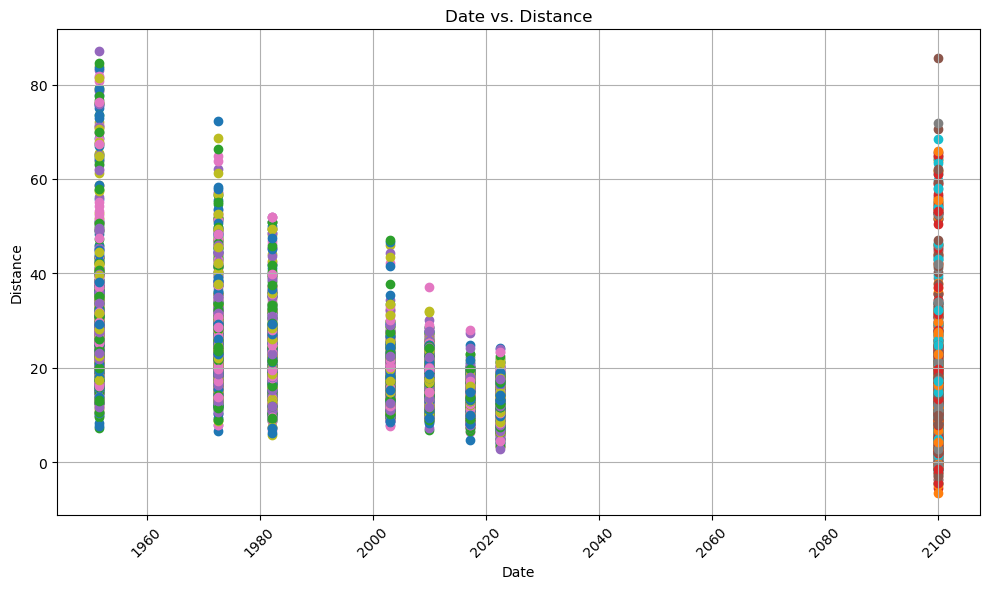

In [8]:
# Calculate the absolute difference between the predicted distances and the old distances for each Transect ID
plt.figure(figsize=(10, 6))

distance_lookup = {}

for group_name, group_data in grouped:
    
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days/365.25
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    # Calculate the predicted distance for the last old data point's date
    last_old_date = group_data['Date'].max()
    numerical_last_old_date = (last_old_date - reference_date).days/365.25
    predicted_distance_last_old = slope * numerical_last_old_date + intercept

    # Calculate the predicted distance for the target date
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days/365.25
    predicted_distance_target = Proj_RR * numerical_target_date + intercept

    # Calculate the absolute difference between the predicted distances
    distance_difference = abs(predicted_distance_last_old - predicted_distance_target)
    distance_lookup[group_name] = distance_difference

    plt.scatter(group_data['Date'], group_data['Distance'], label=f'Transect {group_name}')
    plt.scatter(['2100'], predicted_distance_target, label=f'Predicted Point {group_name}')

    print(f"Transect {group_name} - Distance difference: {distance_difference}")

plt.xlabel('Date')
plt.ylabel('Distance')
plt.title('Date vs. Distance')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [9]:
print(group_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3 entries, 5297 to 5299
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   OBJECTID            3 non-null      int64          
 1   TransectID          3 non-null      int64          
 2   TransOrder          3 non-null      int64          
 3   BaselineID          3 non-null      int64          
 4   ShorelineI          3 non-null      object         
 5   Distance            3 non-null      float64        
 6   IntersectX          3 non-null      float64        
 7   IntersectY          3 non-null      float64        
 8   Uncertaint          3 non-null      float64        
 9   Code                3 non-null      int64          
 10  geometry            3 non-null      geometry       
 11  BaseDate            3 non-null      datetime64[ns] 
 12  Date                3 non-null      datetime64[ns] 
 13  ElapsedTime         3 non-null

In [10]:
distance_lookup

{1: 9.690499045300236,
 2: 8.575936697687348,
 3: 4.58290002150342,
 4: 6.745545234715127,
 5: 3.5398529798792673,
 6: 5.06584716179178,
 7: 3.9963786826853145,
 8: 1.738413914482722,
 9: 2.4008647308745736,
 10: 5.927936733308515,
 11: 7.404487380784781,
 12: 7.986875882007546,
 13: 9.029558598792875,
 14: 2.798577465037635,
 15: 3.713366830217762,
 16: 4.62819252047294,
 17: 2.120461065502452,
 18: 13.84523304425073,
 19: 12.025425752778766,
 20: 9.549772588643258,
 21: 8.4693859641982,
 22: 8.912161043739811,
 23: 9.101500622534303,
 24: 7.806938256422612,
 25: 5.4638223503546435,
 26: 4.74974148379513,
 27: 3.4665891800568183,
 28: 1.4943499696575948,
 29: 2.2640869109469044,
 30: 1.7847374671650833,
 31: 6.554822319667458,
 32: 7.6384794534013984,
 33: 6.476937930955248,
 34: 1.4055915395912493,
 35: 5.6951866056076454,
 36: 2.928389199161373,
 37: 9.361416948400315,
 38: 7.26580831381624,
 39: 5.055095048594872,
 40: 5.604321923147943,
 41: 10.302846597654728,
 42: 9.157326449999

In [11]:
# Replace 'path_to_shapefile' with the actual path to your shapefile
shapefile_path = 'Shapefiles/OhaweBeach_TransectLines.shp'
TransectLine = gpd.read_file(shapefile_path)

#Line shapefiles have azimuth 
TransectLine

,OBJECTID,TransectID,BaselineID,GroupID,TransOrder,Azimuth,ShrCount,TCD,SHAPE_Leng,SCE,...,EPRunc,LRR,LR2,LSE,LCI90,WLR,WR2,WSE,WCI90,geometry
0,1,1,1,0,1,4.87,3,0.0,16.499539,5.05,...,0.06,-0.07,0.72,1.98,0.26,-0.07,0.80,0.59,0.22,"LINESTRING (1695399.166 5618556.437, 1695400.5..."
1,2,2,1,0,2,5.49,3,10.0,17.954064,6.62,...,0.06,-0.08,0.67,2.77,0.37,-0.09,0.76,0.83,0.30,"LINESTRING (1695408.832 5618555.637, 1695410.5..."
2,3,3,1,0,3,6.29,3,20.0,21.421422,9.26,...,0.06,-0.14,0.86,2.76,0.37,-0.15,0.90,0.83,0.30,"LINESTRING (1695418.179 5618552.848, 1695420.5..."
3,4,4,1,0,4,8.22,3,30.0,19.239392,6.80,...,0.06,-0.11,0.91,1.61,0.21,-0.11,0.94,0.48,0.18,"LINESTRING (1695427.773 5618555.419, 1695430.5..."
4,5,5,1,0,5,9.01,3,40.0,21.905003,9.76,...,0.06,-0.16,0.92,2.21,0.29,-0.16,0.95,0.66,0.24,"LINESTRING (1695437.088 5618553.114, 1695440.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,881,894,1,0,894,28.00,5,9240.0,35.282779,23.92,...,0.06,-0.31,0.83,4.67,0.19,-0.29,0.74,1.90,0.23,"LINESTRING (1703961.202 5616810.341, 1703977.7..."
851,882,895,1,0,895,27.26,5,9250.0,33.745203,22.14,...,0.06,-0.27,0.76,5.14,0.21,-0.25,0.64,2.08,0.26,"LINESTRING (1703970.567 5616805.857, 1703986.0..."
852,883,896,1,0,896,26.40,4,9260.0,31.869571,17.03,...,0.06,-0.26,0.90,3.11,0.17,-0.25,0.85,1.27,0.21,"LINESTRING (1703980.960 5616803.477, 1703995.1..."
853,884,897,1,0,897,24.30,4,9270.0,31.526253,16.65,...,0.06,-0.25,0.92,2.67,0.15,-0.24,0.88,1.09,0.18,"LINESTRING (1703991.745 5616800.457, 1704004.7..."


In [12]:
def calculate_new_coordinates(old_x, old_y, bearing, distance):
    bearing_radians = math.radians(bearing)
    new_x = old_x + (distance * math.sin(bearing_radians))
    new_y = old_y + (distance * math.cos(bearing_radians))
    return new_x, new_y

# Calculate New X/Y coordinates for each Transect
new_TransectLine = TransectLine[['TransectID', 'Azimuth']]
new_TransectLine = new_TransectLine.merge(TestPoints_latest[['TransectID', 'IntersectX', 'IntersectY']], on = 'TransectID')

new_TransectLine[['NewX', 'NewY']] = new_TransectLine.apply(lambda row: calculate_new_coordinates(row['IntersectX'],
                                                                                                 row['IntersectY'],
                                                                                                 row['Azimuth'],
                                                                                                 distance_lookup[row.TransectID]),
                                                           axis = 1,
                                                           result_type = 'expand')

new_TransectLine = new_TransectLine.sort_values('TransectID', ascending = True)
new_TransectLine

,TransectID,Azimuth,IntersectX,IntersectY,NewX,NewY
0,1,4.87,1.695400e+06,5.618561e+06,1.695400e+06,5.618571e+06
1,2,5.49,1.695409e+06,5.618562e+06,1.695410e+06,5.618571e+06
2,3,6.29,1.695419e+06,5.618562e+06,1.695420e+06,5.618567e+06
3,4,8.22,1.695429e+06,5.618562e+06,1.695430e+06,5.618569e+06
4,5,9.01,1.695439e+06,5.618563e+06,1.695439e+06,5.618566e+06
...,...,...,...,...,...,...
850,894,28.00,1.703970e+06,5.616826e+06,1.703974e+06,5.616834e+06
851,895,27.26,1.703978e+06,5.616820e+06,1.703981e+06,5.616825e+06
852,896,26.40,1.703987e+06,5.616817e+06,1.703989e+06,5.616820e+06
853,897,24.30,1.703998e+06,5.616815e+06,1.703999e+06,5.616817e+06


<Axes: >

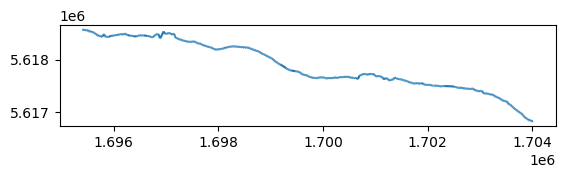

In [13]:
# Convert Dataframe to geodataframe
new_TransectLine = gpd.GeoDataFrame(new_TransectLine, geometry = gpd.points_from_xy(new_TransectLine.NewX, 
                                                                       new_TransectLine.NewY),
                                    crs = 'EPSG:2193').rename(columns = {'geometry': 'from_point'})
# Get from and to points
new_TransectLine['to_point'] = new_TransectLine.from_point.shift(-1)
new_TransectLine.loc[new_TransectLine["to_point"].isna(), "to_point"] = new_TransectLine["from_point"]

# Get Line geometry between points
new_TransectLine['geometry'] = new_TransectLine.apply(lambda row: LineString([row['from_point'], row['to_point']]),
                                                 axis = 1)
new_TransectLine.plot()

<Axes: >

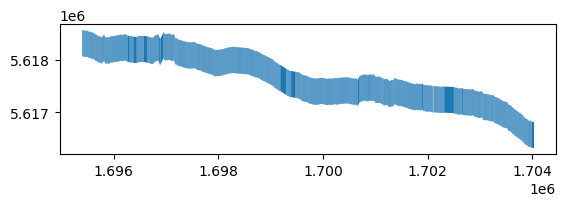

In [14]:
#Add code to make line into polygon extending 500m to the left
def extend(line):
  return line.union(translate(line, yoff=-500)).convex_hull

Shoreline_polygon = new_TransectLine.geometry.apply(extend)

# Create a new GeoDataFrame from the polygons
Shoreline_polygon_gdf = gpd.GeoDataFrame(geometry=Shoreline_polygon, crs='EPSG:2193')

# Copy the attribute columns from the original line GeoDataFrame
Shoreline_polygon_gdf = Shoreline_polygon_gdf.join(new_TransectLine.drop('geometry', axis=1))

Shoreline_polygon_gdf.plot()

In [15]:
# Assuming Shoreline_polygon_gdf has multiple geometry columns, select the one you want to save
# Replace 'selected_geometry_column_name' with the actual column name
selected_geometry_column = 'geometry'

# Create a new GeoDataFrame with just the selected geometry column
gdf = gpd.GeoDataFrame(geometry=Shoreline_polygon_gdf[selected_geometry_column])

# Convert LINESTRING to POLYGON using the .buffer(0) method
gdf['geometry'] = gdf['geometry'].buffer(0)

# Define the path where you want to save the shapefile
output_shapefile = "Projected_Shoreline_Polygons/OhaweBeach_sqrt.shp"  # Replace with your desired file path and name

# Define the EPSG code for the desired spatial reference (e.g., 2193 for New Zealand Transverse Mercator)
spatial_reference = "EPSG:2193"

# Set the GeoDataFrame's CRS (Coordinate Reference System) to the desired spatial reference
gdf.crs = spatial_reference

# Save the GeoDataFrame as a shapefile with the specified CRS
gdf.to_file(output_shapefile, driver="ESRI Shapefile")

# Verify that the shapefile has been created successfully
print(f"Shapefile saved to {output_shapefile} with CRS: {spatial_reference}")

Shapefile saved to Projected_Shoreline_Polygons/OhaweBeach_sqrt.shp with CRS: EPSG:2193
